In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import io
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [9]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); 
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show()

In [10]:
# Load dataset_part_2.csv
URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
data = pd.read_csv(io.BytesIO(requests.get(URL1).content))

# Load dataset_part_3.csv (Features)
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
X = pd.read_csv(io.BytesIO(requests.get(URL2).content))

data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [11]:
# TASK 1
Y = data['Class'].to_numpy()

# TASK 2
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)

# TASK 3
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

Best parameters:  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy:  0.8464285714285713
Test accuracy:  0.8333333333333334


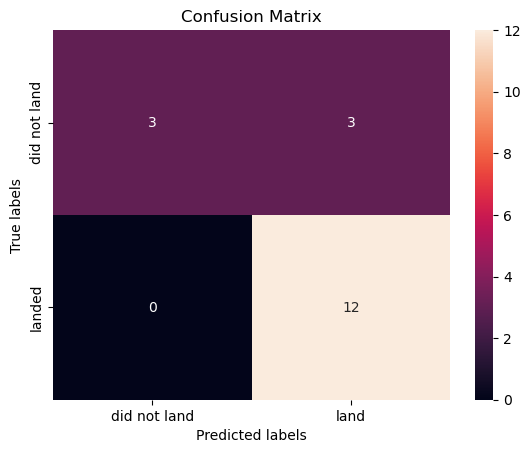

In [12]:
# TASK 4
parameters = {"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}
lr = LogisticRegression()
logreg_cv = GridSearchCV(lr, parameters, cv=10)
logreg_cv.fit(X_train, Y_train)

print("Best parameters: ", logreg_cv.best_params_)
print("Accuracy: ", logreg_cv.best_score_)

# TASK 5
logreg_score = logreg_cv.score(X_test, Y_test)
print("Test accuracy: ", logreg_score)

yhat = logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

In [13]:
# TASK 6
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()
svm_cv = GridSearchCV(svm, parameters, cv=10)
svm_cv.fit(X_train, Y_train)

# TASK 7
svm_score = svm_cv.score(X_test, Y_test)
print("SVM accuracy: ", svm_score)

SVM accuracy:  0.8333333333333334


In [14]:
# TASK 8
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}
tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree, parameters, cv=10)
tree_cv.fit(X_train, Y_train)

# TASK 9
tree_score = tree_cv.score(X_test, Y_test)
print("Decision Tree accuracy: ", tree_score)

Decision Tree accuracy:  0.6111111111111112


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 471, in _validate_param

In [15]:
# TASK 10
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}
KNN = KNeighborsClassifier()
knn_cv = GridSearchCV(KNN, parameters, cv=10)
knn_cv.fit(X_train, Y_train)

# TASK 11
knn_score = knn_cv.score(X_test, Y_test)
print("KNN accuracy: ", knn_score)

KNN accuracy:  0.8333333333333334


The best method is Logistic Regression with a score of 0.8333333333333334


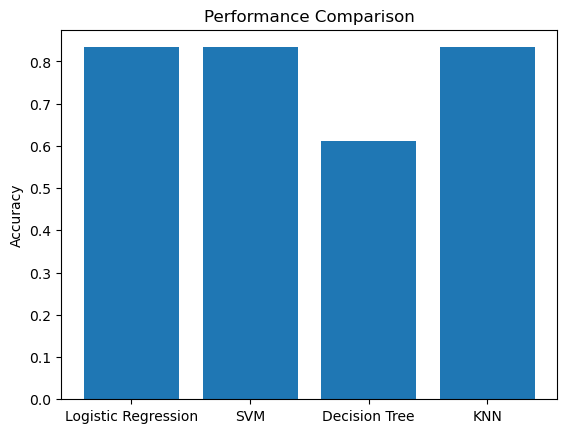

In [16]:
# TASK 12
scores = {'Logistic Regression': logreg_score, 'SVM': svm_score, 'Decision Tree': tree_score, 'KNN': knn_score}
best_model = max(scores, key=scores.get)
print(f"The best method is {best_model} with a score of {scores[best_model]}")

# Visualization
plt.bar(scores.keys(), scores.values())
plt.ylabel('Accuracy')
plt.title('Performance Comparison')
plt.show()